# Examine Sentinel-2 Model Deployment Chip Score Versus Distance to Plants

## Import required libraries

In [1]:
import os
import glob

import geopandas as gpd
import pandas as pd
import numpy as np

import boto3

from matplotlib import pyplot as plt

from IPython.display import clear_output

## Inputs and parameters

In [2]:
s3_path = 'S2-RGB-macro-localization-model-deployment4/'
consolidated_score_gjson = 'S2-deployment-chip-scores-CHN-10km-nowater-2020-consolidated.geojson'
s2_grid_gjson = '../../resources/macro-loc-model-deployment4/S2-deployment-grid-CHN-10km-nowater.geojson'
LOCAL_DIR = '/scratch/'

In [3]:
calc_crs = 'EPSG:3395'

In [4]:
s3 = boto3.resource('s3')
bucket = s3.Bucket('sfi-shared-assets')

## Outputs

In [5]:
deployment_data_path = '../../resources/macro-loc-model-deployment4/'
output_prefix = 'S2-deployment-CHN-10km-nowater-2020-'

cmt_dist_csv = deployment_data_path+output_prefix+'cement-knwn-chip-dist.csv'
cmt_dist_2dhist_png = deployment_data_path+output_prefix+'cement-dist-2dhist.png'
cmt_dist_1dhist_png = deployment_data_path+output_prefix+'cement-dist-1dhist.png'
cmt_chp_cntr_comp_png = deployment_data_path+output_prefix+'cement-cntr-score-compare.png'

stl_dist_csv = deployment_data_path+output_prefix+'steel-knwn-chip-dist.csv'
stl_dist_2dhist_png = deployment_data_path+output_prefix+'steel-dist-2dhist.png'
stl_dist_1dhist_png = deployment_data_path+output_prefix+'steel-dist-1dhist.png'
stl_chp_cntr_comp_png = deployment_data_path+output_prefix+'steel-cntr-score-compare.png'

## Download consolidated deployment results and read it in

In [6]:
bucket.download_file(s3_path+consolidated_score_gjson,
                     LOCAL_DIR+consolidated_score_gjson)

In [7]:
unq_chip_gdf = gpd.read_file(LOCAL_DIR+consolidated_score_gjson)

In [8]:
chp_cnt = len(unq_chip_gdf)
print('Number of chips: ', str(chp_cnt))

Number of chips:  415036


## Study whether distance from chip center to plant affects results

### Cement

In [9]:
cmt_prob_knwn = unq_chip_gdf[~unq_chip_gdf.cmtv4p1_uid.isnull()]

In [10]:
print(len(cmt_prob_knwn))

920


In [11]:
cmt_prob_knwn['tile_cmtv4p1_distm'] = cmt_prob_knwn.tile_cmtv4p1_distm.astype('float')

/opt/conda/envs/earthai/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


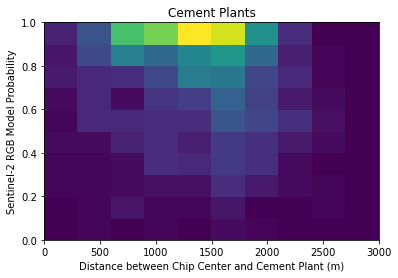

In [12]:
fig, ax = plt.subplots(1)
h, xedge, yedge, im = plt.hist2d(cmt_prob_knwn.tile_cmtv4p1_distm, cmt_prob_knwn.tile_cmt_prob, 
                                 bins=[10, 10],
                                 range=[[0, 3000], [0, 1]])
plt.title('Cement Plants')
plt.xlabel('Distance between Chip Center and Cement Plant (m)')
plt.ylabel('Sentinel-2 RGB Model Probability')
fig.savefig(cmt_dist_2dhist_png)

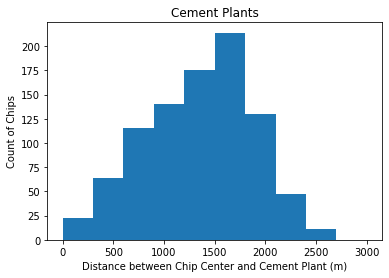

In [13]:
fig, ax = plt.subplots(1)
plt.bar(x=xedge[:-1],
        height=h.sum(axis=1),
        align='edge',
        width=300)
plt.title('Cement Plants')
plt.ylabel('Count of Chips')
plt.xlabel('Distance between Chip Center and Cement Plant (m)')
plt.show()
fig.savefig(cmt_dist_1dhist_png)

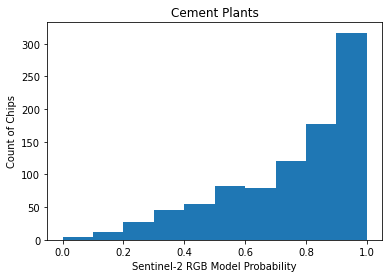

In [14]:
fig, ax = plt.subplots(1)
plt.bar(x=yedge[:-1],
        height=h.sum(axis=0),
        align='edge',
        width=0.1)
plt.title('Cement Plants')
plt.ylabel('Count of Chips')
plt.xlabel('Sentinel-2 RGB Model Probability')
plt.show()

### Steel

In [15]:
stl_prob_knwn = unq_chip_gdf[~unq_chip_gdf.stlv4p1_uid.isnull()]

In [16]:
print(len(stl_prob_knwn))

171


In [17]:
stl_prob_knwn['tile_stlv4p1_distm'] = stl_prob_knwn.tile_stlv4p1_distm.astype('float')

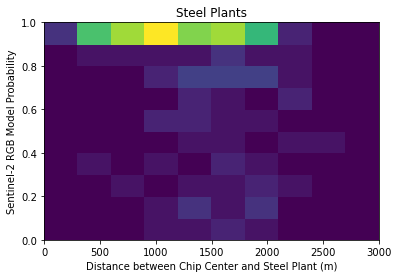

In [18]:
fig, ax = plt.subplots(1)
h, xedge, yedge, im = plt.hist2d(stl_prob_knwn.tile_stlv4p1_distm, stl_prob_knwn.tile_stl_prob, 
                                 bins=[10, 10],
                                 range=[[0, 3000], [0, 1]])
plt.title('Steel Plants')
plt.xlabel('Distance between Chip Center and Steel Plant (m)')
plt.ylabel('Sentinel-2 RGB Model Probability')
fig.savefig(stl_dist_2dhist_png)

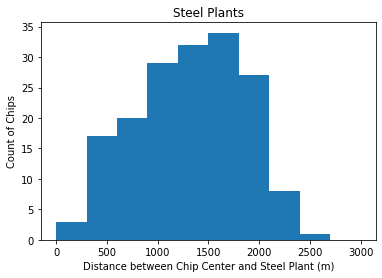

In [19]:
fig, ax = plt.subplots(1)
plt.bar(x=xedge[:-1],
        height=h.sum(axis=1),
        align='edge',
        width=300)
plt.title('Steel Plants')
plt.ylabel('Count of Chips')
plt.xlabel('Distance between Chip Center and Steel Plant (m)')
plt.show()
fig.savefig(stl_dist_1dhist_png)

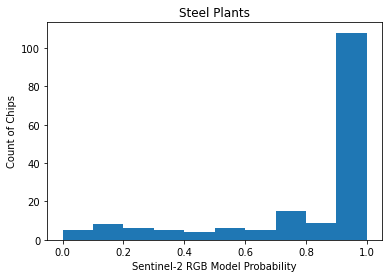

In [20]:
fig, ax = plt.subplots(1)
plt.bar(x=yedge[:-1],
        height=h.sum(axis=0),
        align='edge',
        width=0.1)
plt.title('Steel Plants')
plt.ylabel('Count of Chips')
plt.xlabel('Sentinel-2 RGB Model Probability')
plt.show()